In [1]:
%pip install getdist corner fgivenx deap numdifftools

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 777 kB 4.9 MB/s 
     |████████████████████████████████| 617 kB 25.8 MB/s 
     |████████████████████████████████| 160 kB 24.8 MB/s 
     |████████████████████████████████| 99 kB 5.3 MB/s 
     |████████████████████████████████| 38.1 MB 1.6 MB/s 
     |████████████████████████████████| 596 kB 48.7 MB/s 
     |████████████████████████████████| 189 kB 54.9 MB/s 
  Created wheel for getdist: filename=GetDist-1.3.4-py3-none-any.whl size=226496 sha256=b9b329ec590359bdd2bf66fb2cfe6d3fb358718eeedef1b6f8310c864be4c7b6
  Stored in directory: /root/.cache/pip/wheels/b4/f0/9d/b16a7e7cb4bc8467e9d2c1b0fbd734e50622562f69a2a41edd
  Created wheel for algopy: filename=algopy-0.5.7-py3-none-any.whl size=107608 sha256=38db22e831edd9a247306ffb91ea83e00be387e8fee2d8397c2d86ded18dd8de
  Stored in directory: /root/.cache/pip/wheels/a8/fd/06/21dc6aba9f680fdbde386c06b1a8a1c

In [2]:
!pip install -e git+https://github.com/ja-vazquez/SimpleMC#egg=simplemc

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining simplemc from git+https://github.com/ja-vazquez/SimpleMC#egg=simplemc
  Cloning https://github.com/ja-vazquez/SimpleMC to ./src/simplemc
  Running command git clone -q https://github.com/ja-vazquez/SimpleMC /content/src/simplemc
     |████████████████████████████████| 2.5 MB 6.7 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for mpi4py: filename=mpi4py-3.1.3-cp37-cp37m-linux_x86_64.whl size=2185264 sha256=7d337b0f63c7a03d308fdab81ab5d81d77388d6a218c2129baf045b806b555a2
  Stored in directory: /root/.cache/pip/wheels/7a/07/14/6a0c63fa2c6e473c6edc40985b7d89f05c61ff25ee7f0ad9ac
Successfully built mpi4py
  Running setup.py develop for simplemc


To install permamently libraries in Google Colab, please see https://stackoverflow.com/questions/55253498/how-do-i-install-a-library-permanently-in-colab 

**Test that simplemc is successfully installed**

In [3]:
%cd /content/src/simplemc/
import simplemc

/content/src/simplemc


**Import generic libraries**

In [4]:
import matplotlib.pyplot as plt
import numpy as np



# Cosmological calculator

Available functions in Cosmocalc:

- 'Hubble'
- 'DaOverrd'
- 'HIOverrd'
- 'DVOverrd'
- 'HubInvOverz'
- 'SNIa'
- 'fs8'
- 'Age' (without plot)

```
CosmoCalcmodel(model, funct=None, param=None, minparam=None,
               maxparam=None, nsteps=3, savepdf=False, zmax=3,
               plot_data=False)
```
If `param=None` the parameters values are the defaults included in `cosmo/paramDefs.py`. You can choose some parameter of the chosen model, and vary plot it using `minparam`, `maxparam` and `nsteps`.

## 1.1. Cosmic chronometers and Hubble function

In [ ]:
from simplemc.CosmoCalc import CosmoCalc

LCDM


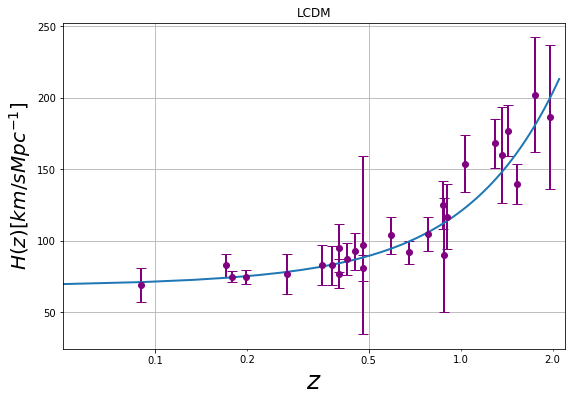

In [ ]:
C = CosmoCalc('LCDM', funct='Hubble', plot_data=True, zmax=2.1)
plot = C.run_plot(lw='2')
# plot.savefig('cosmocalc_hubble.png', dpi=300)

## 1.2. Compute the age of the Universe, the $Da/r_d(z=2)$ and $f \sigma_8(z=2)$




In [ ]:
C = CosmoCalc('LCDM', funct='Age')
C.Age(), C.DaOverrd(z=2), C.fs8(z=2)

LCDM
13.78Gys


(13.775572047446666, 25.392400314890214, 0.32184806231739976)

## 1.3. Distance modulus to LCDM and SNeIa datasets

LCDM


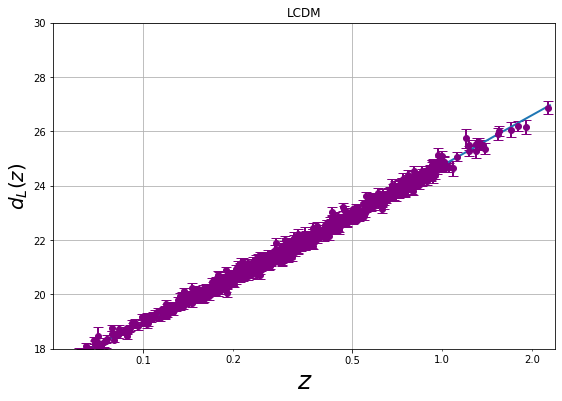

In [ ]:
C = CosmoCalc('LCDM', funct='SNIa', plot_data=True, zmax=2.3)
plot = C.run_plot(lw='2')
# plot.savefig('cosmocalc_sn.png', dpi=300)

## 1.4 BAO data

Varying a model parameter.

LCDM


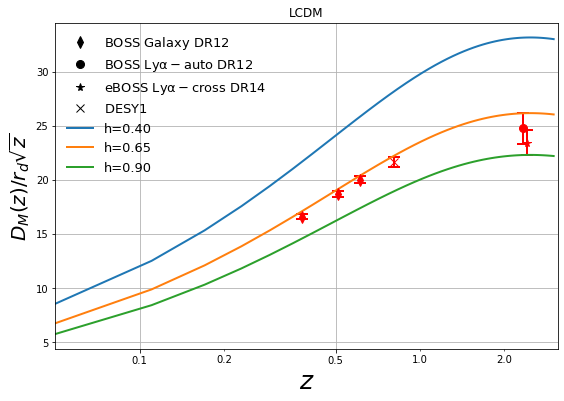

In [ ]:
C = CosmoCalc('LCDM', funct='DaOverrd', param='h', minparam=0.4, maxparam=0.9, nsteps=3, plot_data=True)
plot = C.run_plot(lw='2')
# plot.savefig('cosmocalc_daoverrd.png', dpi=300)

## 1.5. $f \sigma_8$ measurements and $f \sigma_8(z)$ to CPL (owacdm) with several values to $w_a$

owaCDM


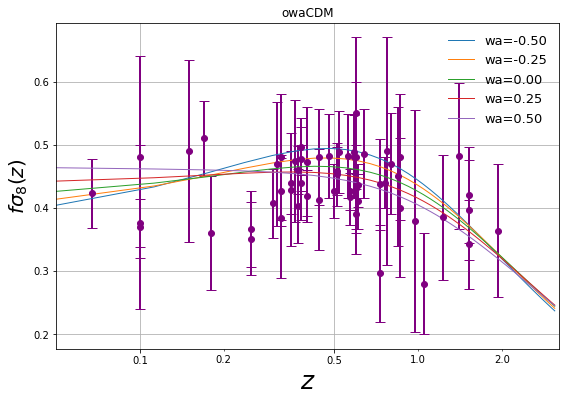

In [ ]:
C = CosmoCalc('owaCDM', 'fs8', 'wa', -0.5, 0.5, 5, zmax=3.1, plot_data=True)
plot = C.run_plot(lw='1')
# plot.savefig('cosmocalc_fs8data.png', dpi=300)

# MLE with genetic algorithms

In [5]:
import matplotlib.pyplot as plt
from simplemc.DriverMC import DriverMC
from simplemc.plots.Plot_elipses import plot_elipses

In [6]:
analyzer1 = DriverMC(analyzername="ga_deap", model="LCDM", datasets="HD", chainsdir='simplemc/chains/')

Loading  /content/src/simplemc/simplemc/data/HDiagramCompilacion-data_31.txt
Loading  /content/src/simplemc/simplemc/data/HDiagramCompilacion-cov_31.txt
Eigenvalues of cov matrix: [16.0, 25.0, 64.0] ... 3844.0
Adding marginalising constant
Free parameters:
Om = 0.3038 +/- 0.05
Obh2 = 0.02234 +/- 0.001
h = 0.6821 +/- 0.05


In [7]:
res1 = analyzer1.executer()

Minimizing... [0.3038, 0.02234, 0.6821] with bounds [(0.1, 0.5), (0.02, 0.025), (0.4, 0.9)]
gen	nevals	min    	avg   
0  	20    	9.34904	30.108
1  	16    	8.29556	20.8984
2  	14    	8.29556	25.031 
3  	16    	8.29556	21.0975
4  	16    	8.20547	16.5404
5  	17    	8.09436	16.6349
6  	14    	8.09436	15.3003
7  	17    	7.3422 	12.377 
8  	12    	7.33737	11.5643
9  	18    	7.29408	8.94296
10 	12    	7.29408	8.22988
11 	16    	7.29408	12.4521
12 	17    	7.29408	10.7496
13 	14    	7.29394	9.94689
14 	18    	7.28049	7.9385 
15 	13    	7.28049	14.9918
16 	16    	7.278  	11.7636
17 	16    	7.278  	9.8134 
18 	15    	7.27675	10.3429
19 	12    	7.27675	8.30349
20 	17    	7.26184	11.1742
21 	16    	7.26088	10.2024
22 	17    	7.26088	11.4275
23 	17    	7.26088	12.1569
24 	12    	7.26088	9.8698 
25 	16    	7.26088	9.86115
26 	16    	7.26088	10.4761
27 	16    	7.26088	9.07152
28 	13    	7.25682	9.4314 
29 	16    	7.25682	8.35468
30 	13    	7.25682	8.56773
31 	16    	7.25682	9.91993
32 	18    	7.25631	

INFO:simplemc:
Elapsed time: 0.271 minutes = 16.252 seconds


100	15    	7.25173	7.88688
-- Best Fitness =  7.251726926891076
- Best solutions are:
-- Best Om =  0.3222912305509723
-- Best Obh2 =  0.022016648406663737
-- Best h =  0.6791045936128557
Hessian [[7.07996114e+02 0.00000000e+00 8.19428251e+02]
 [0.00000000e+00 4.72589792e+06 0.00000000e+00]
 [8.19428251e+02 0.00000000e+00 1.46730974e+03]] [1.84546091e+02+0.j 1.99075976e+03+0.j 4.72589792e+06+0.j]
Covariance matrix 
 [[ 3.99390836e-03 -0.00000000e+00 -2.23042298e-03]
 [ 0.00000000e+00  2.11600000e-07  0.00000000e+00]
 [-2.23042298e-03  0.00000000e+00  1.92711295e-03]]
Om: 0.3223 +/- 0.0632
Obh2: 0.0220 +/- 0.0005
h: 0.6791 +/- 0.0439

Information criterions:

	AIC: -8.5035


In [8]:
resx1 = res1['result']['param_fit']
cov1 = res1['result']['cov']

In [9]:
analyzer2 = DriverMC(analyzername="maxlike", model="LCDM", datasets="HD")

Loading  /content/src/simplemc/simplemc/data/HDiagramCompilacion-data_31.txt
Loading  /content/src/simplemc/simplemc/data/HDiagramCompilacion-cov_31.txt
Eigenvalues of cov matrix: [16.0, 25.0, 64.0] ... 3844.0
Adding marginalising constant
Free parameters:
Om = 0.3038 +/- 0.05
Obh2 = 0.02234 +/- 0.001
h = 0.6821 +/- 0.05


In [10]:
res2 = analyzer2.executer()

Minimizing... [0.3038, 0.02234, 0.6821] with bounds [(0.1, 0.5), (0.02, 0.025), (0.4, 0.9)]
      fun: 7.24997951408073
 hess_inv: <3x3 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 6.12843110e-06, -4.14868140e-04,  6.30606675e-06])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 68
      nit: 10
     njev: 17
   status: 0
  success: True
        x: array([0.31931955, 0.02201999, 0.68167758]) with Errors = False


INFO:simplemc:
Elapsed time: 0.004 minutes = 0.240 seconds


Hessian [[7.18729527e+02 0.00000000e+00 8.21876273e+02]
 [0.00000000e+00 4.72589792e+06 0.00000000e+00]
 [8.21876273e+02 0.00000000e+00 1.46014125e+03]] [1.87823808e+02+0.j 1.99104697e+03+0.j 4.72589792e+06+0.j]
------
Done.
Optimal loglike :  7.24997951408073
Om = 0.3193195452714862 +/- 0.05
Obh2 = 0.022019994912207422 +/- 0.001
h = 0.681677580955738 +/- 0.05
------
Done.
Optimal loglike :  7.24997951408073
Om: 0.3193 +/- 0.0625
Obh2: 0.0220 +/- 0.0005
h: 0.6817 +/- 0.0438

Information criterions:

	AIC: -8.5000


In [11]:
resx2 = res2['result']['param_fit']
cov2 = res2['result']['cov']

-- vals, vecs --  [3.99390836e-03 2.11600000e-07] [[-1.  0.]
 [-0. -1.]]
-- vals, vecs --  [3.90447571e-03 2.11600000e-07] [[-1.  0.]
 [-0. -1.]]


Text(0, 0.5, '$h$')

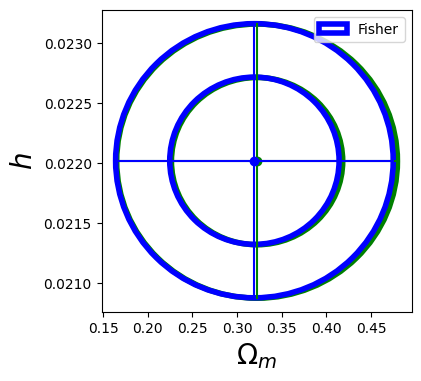

In [15]:
idx_param1 = 0
idx_param2 = 1

fig = plt.figure(figsize=(4,4), dpi=100)
ax1 = fig.add_subplot(111)

e1 = plot_elipses(resx1, cov1, idx_param1, idx_param2, ax=ax1, axis_sty = '-g')

e2 = plot_elipses(resx2, cov2, idx_param1, idx_param2, ax=ax1, 
             contour_col='b', axis_sty = '-b')

plt.xlabel(r'$\Omega_m$')
plt.ylabel(r'$h$')
# plt.ylim(0.4, 1.1)

# 3. Bayesian Inference

In [12]:
from simplemc.DriverMC import DriverMC
from simplemc.plots import Simple_Plots
from getdist import plots, MCSamples
import getdist

**MCMC**

In [39]:
analysis1 = DriverMC(analyzername='mcmc', model='LCDM', datasets='HD+SN', mcevidence=True)

Loading  /content/src/simplemc/simplemc/data/HDiagramCompilacion-data_31.txt
Loading  /content/src/simplemc/simplemc/data/HDiagramCompilacion-cov_31.txt
Eigenvalues of cov matrix: [16.0, 25.0, 64.0] ... 3844.0
Adding marginalising constant
Loading  /content/src/simplemc/simplemc/data/jla_binned_distances_31nodes_v1.txt
Loading  /content/src/simplemc/simplemc/data/cov_jla_binned_distances_31nodes_v1.txt
Eigenvalues of cov matrix: [0.0005070806003107862, 0.0005683516014088379, 0.0007392509073862131] ... 0.036459822761285926
Adding marginalising constant
Free parameters:
Om = 0.3038 +/- 0.05
Obh2 = 0.02234 +/- 0.001
h = 0.6821 +/- 0.05


In [40]:
res1 = analysis1.executer(GRstop=0.01, nsamp=1000)

INFO:simplemc:
	nsamp: 1000
	skip: 300
	temp: 2
	mcevidence: True
	GRstop: 0.01


Hello, World! I am process 0 of 1 on e6bff32e8cbd
Bounds: [0.1  0.02 0.4 ] [0.5   0.025 0.9  ]
Starting chain...

Re-initializing covariance matrix after burn-in
[[ 1.05947940e-03 -3.83016493e-07 -8.03206155e-04]
 [-3.83016493e-07  1.34969343e-07 -2.08584760e-06]
 [-8.03206155e-04 -2.08584760e-06  8.39861330e-04]]

Number of steps achieved


INFO:simplemc.analyzers.MCEvidence:Loading chain from simplemc/chains/LCDM_phy_HD+SN_mcmc
INFO:simplemc.analyzers.MCEvidence: loading files: simplemc/chains/LCDM_phy_HD+SN_mcmc_?.txt
INFO:simplemc.analyzers.MCEvidence:loading: simplemc/chains/LCDM_phy_HD+SN_mcmc_1.txt
INFO:simplemc.analyzers.MCEvidence:chain array dimensions: [701] x 3 =
INFO:simplemc.analyzers.MCEvidence:Estimating covariance matrix using all chains
INFO:simplemc.analyzers.MCEvidence:covariance matrix estimated using nsample=701
INFO:simplemc.analyzers.MCEvidence:getting samples for partition s1: nsamples=701
INFO:simplemc.analyzers.MCEvidence:   ln(B)[k=1] = -35.69729501354095
INFO:simplemc.analyzers.MCEvidence:   ln(B)[k=2] = -35.742856194426786
INFO:simplemc.analyzers.MCEvidence:   ln(B)[k=3] = -35.74345974331243
INFO:simplemc.analyzers.MCEvidence:   ln(B)[k=4] = -35.76242159978622



Covariance matrix saved in .covmat file
 [[ 8.63522357e-04  5.21701025e-07 -4.49468027e-04]
 [ 5.21701025e-07  1.76026485e-07 -1.25461994e-06]
 [-4.49468027e-04 -1.25461994e-06  8.54248935e-04]] 



simplemc/chains/LCDM_phy_HD+SN_mcmc_1.txt
Removed no burn in


INFO:simplemc:
Elapsed time: 2.188 minutes = 131.268 seconds



getdist cov
 [[ 8.60726052e-04  5.55465484e-07 -4.47543861e-04]
 [ 5.55465484e-07  1.74978554e-07 -1.26001114e-06]
 [-4.47543861e-04 -1.26001114e-06  8.48121394e-04]] 

Om: 0.3068 +/- 0.0294
Obh2: 0.0221 +/- 0.0004
h: 0.6929 +/- 0.0292

Information criterions:

	AIC: 53.8434


In [37]:
pars_labels = ['${}$'.format(p.Ltxname) for p in analysis1.pars_info]
pars_labels

['$\\Omega_m$', '$\\Omega_{b}h^2$', '$h$']

In [38]:
samples1 = res1['result']['samples']
weights1 = res1['result']['weights']

In [21]:
om1 = res1['result']['samples'][:,0]
obh21 = res1['result']['samples'][:,1]
h1 = res1['result']['samples'][:,2]


**Nested Sampling**

In [22]:
analysis2 = DriverMC(analyzername='nested', model='LCDM', datasets='HD+SN')

Loading  /content/src/simplemc/simplemc/data/HDiagramCompilacion-data_31.txt
Loading  /content/src/simplemc/simplemc/data/HDiagramCompilacion-cov_31.txt
Eigenvalues of cov matrix: [16.0, 25.0, 64.0] ... 3844.0
Adding marginalising constant
Loading  /content/src/simplemc/simplemc/data/jla_binned_distances_31nodes_v1.txt
Loading  /content/src/simplemc/simplemc/data/cov_jla_binned_distances_31nodes_v1.txt
Eigenvalues of cov matrix: [0.0005070806003107862, 0.0005683516014088379, 0.0007392509073862131] ... 0.036459822761285926
Adding marginalising constant
Free parameters:
Om = 0.3038 +/- 0.05
Obh2 = 0.02234 +/- 0.001
h = 0.6821 +/- 0.05


In [23]:
res2 = analysis2.executer(nlivepoints=100)

INFO:simplemc:Using 1 processor
INFO:simplemc:
	nlivepoints: 100
	accuracy: 0.01
	nested type: multi


it: 971 | ncall: 5153 | eff: 18.863 | logz: -28.9751 | dlogz: 0.0100 | loglstar: -23.9530 | point 0.29383738 0.02200326 0.69509915

INFO:simplemc:
Elapsed time: 7.745 minutes = 464.727 seconds



Covariance matrix saved in .covmat file
 [[ 7.87044741e-04  2.49409623e-08 -4.22738235e-04]
 [ 2.49409623e-08  1.95239946e-07 -1.97358298e-07]
 [-4.22738235e-04 -1.97358298e-07  8.91183314e-04]] 

simplemc/chains/LCDM_phy_HD+SN_nested_multi_1.txt
Removed no burn in

getdist cov
 [[ 7.85328497e-04  2.48851587e-08 -4.21816406e-04]
 [ 2.48851587e-08  1.94814132e-07 -1.96930714e-07]
 [-4.21816406e-04 -1.96930714e-07  8.89239992e-04]] 

Om: 0.3059 +/- 0.0281
Obh2: 0.0220 +/- 0.0004
h: 0.6908 +/- 0.0299

Information criterions:

	AIC: 53.8198


In [25]:
samples2 = res2['result']['samples']
weights2 = res2['result']['weights']
om2 = res2['result']['samples'][:,0]
obh22 = res2['result']['samples'][:,1]
h2 = res2['result']['samples'][:,2]

**Plot with GetDist**

In [26]:
# names = ["SN+BBAO", "SN+HD", "SN+HD+BBAO", "SN+HD+BBAO+Planck"]
labels =  ['{}'.format(p.Ltxname) for p in analysis1.pars_info]
labels, np.shape(samples1)

(['\\Omega_m', '\\Omega_{b}h^2', 'h'], (700, 3))

In [29]:
samp1 = MCSamples(samples=samples1, names=labels, labels = labels, label='MCMC')
samp2 = MCSamples(samples=samples2, names = labels, labels = labels, label='Nested Sampling')

Removed no burn in
Removed no burn in


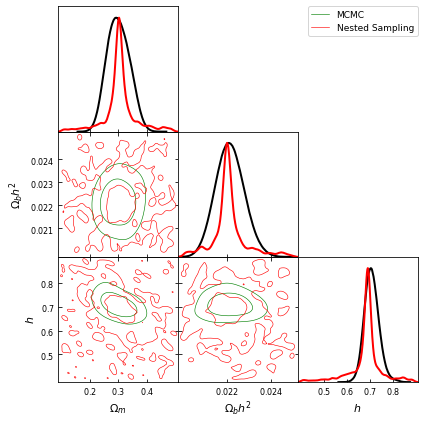

In [31]:
# Triangle plot
g = plots.get_subplot_plotter()
g.triangle_plot([samp1, samp2], filled=False, line_args={'lw':2},
                colors=['green', 'red', 'indigo'],
                settings={ 'smooth_scale_2D':0.1, 'smooth_scale_1D':0.1},)

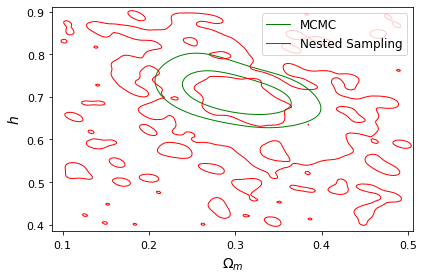

In [34]:

g = plots.get_single_plotter(width_inch=6, ratio= 2. / 3.)
g.settings.legend_fontsize = 12
g.plot_2d([samp1, samp2], labels[0], labels[2], filled=False, line_args={'lw':1},
          colors=['green', 'red'], smooth_s=0.8)

g.add_legend(['MCMC', 'Nested Sampling'], legend_loc='upper right');

# 4. Using a ini file

Excercise:

  - Explore the ``baseConfig.ini`` file.
  - Generate an ini file and run it with the ``DriverMC class``.

In [ ]:
from simplemc.DriverMC import DriverMC

In [36]:
path_ini = "/content/src/simplemc/"
inifile = "prueba.ini"

analyzer = DriverMC(iniFile=path_ini+inifile)
res = analyzer.executer()

INFO:simplemc:Using 2 processors of 2 .


Loading  /content/src/simplemc/simplemc/data/HDiagramCompilacion-data_31.txt
Loading  /content/src/simplemc/simplemc/data/HDiagramCompilacion-cov_31.txt
Eigenvalues of cov matrix: [16.0, 25.0, 64.0] ... 3844.0
Adding marginalising constant
Free parameters:
Om = 0.3038 +/- 0.05
Obh2 = 0.02234 +/- 0.001
h = 0.6821 +/- 0.05


INFO:simplemc:
	nlivepoints: 50
	accuracy: 0.5
	nested type: multi


it: 243 | ncall: 1891 | eff: 12.903 | logz: -11.6660 | dlogz: 0.5038 | loglstar: -8.0818 | point 0.40507792 0.02221343 0.6332958 

INFO:simplemc:
Elapsed time: 0.180 minutes = 10.790 seconds



Covariance matrix saved in .covmat file
 [[ 4.09219584e-03  2.07260195e-06 -2.41602224e-03]
 [ 2.07260195e-06  1.98744210e-07 -6.96170067e-07]
 [-2.41602224e-03 -6.96170067e-07  2.09201120e-03]] 

/content/src/simplemc/simplemc/chains/LCDM_phy_HD_nested_multi_1.txt
Removed no burn in

getdist cov
 [[ 4.06946653e-03  2.06107760e-06 -2.40260290e-03]
 [ 2.06107760e-06  1.97640134e-07 -6.92294367e-07]
 [-2.40260290e-03 -6.92294367e-07  2.08039151e-03]] 

Om: 0.3305 +/- 0.0640
Obh2: 0.0220 +/- 0.0004
h: 0.6776 +/- 0.0457

Information criterions:

	AIC: 20.5656


{'analyzer': 'nested',
 'dynamic': False,
 'nested_algorithm': 'multi',
 'result': {'%eff': 15.547329455314648,
  'loglikes': array([93.87033516, 77.81761215, 65.59689282, 65.02420781, 58.55465651,
         56.10125839, 53.91780577, 53.47759338, 52.04517897, 49.43713478,
         46.88477521, 44.62170413, 44.37778464, 42.00403806, 41.6945765 ,
         41.07092149, 40.89617324, 38.48714014, 37.64103601, 36.81412135,
         36.53597267, 36.24402426, 35.55435435, 33.94040606, 32.89654569,
         31.93377959, 31.41736871, 30.88517976, 29.79209463, 29.4959361 ,
         29.36141301, 28.85240007, 28.12796081, 27.95846836, 27.8004978 ,
         27.6854221 , 26.90059284, 26.37868653, 26.21555974, 25.78183564,
         25.41073891, 25.15990505, 24.91436097, 24.76567952, 24.39446153,
         24.01760191, 23.45830911, 23.16777883, 22.683997  , 21.7993522 ,
         21.57151201, 20.65415665, 20.44320955, 20.21448281, 19.59928749,
         19.34330693, 18.96272657, 18.9255448 , 18.61417906, 1

# 5. Model comparison

Exercise: Add code from Docs: https://igomezv.github.io/SimpleMC/tuto_modelcomparison.html 

In [ ]:
### Add code from Docs

In [ ]:
model1 = DriverMC(analyzername='nested', model='LCDM', datasets='HD+SN+CBAO')
res1 = model1.executer(nlivepoints=100)

Loading  /content/src/simplemc/simplemc/data/HDiagramCompilacion-data_31.txt
Loading  /content/src/simplemc/simplemc/data/HDiagramCompilacion-cov_31.txt
Eigenvalues of cov matrix: [16.0, 25.0, 64.0] ... 3844.0
Adding marginalising constant
Loading  /content/src/simplemc/simplemc/data/jla_binned_distances_31nodes_v1.txt
Loading  /content/src/simplemc/simplemc/data/cov_jla_binned_distances_31nodes_v1.txt
Eigenvalues of cov matrix: [0.0005070806003107862, 0.0005683516014088379, 0.0007392509073862131] ... 0.036459822761285926
Adding marginalising constant
Loading  /content/src/simplemc/simplemc/data/sdss_DR12Consensus_bao.dat
Loading  /content/src/simplemc/simplemc/data/BAO_consensus_covtot_dM_Hz.txt
Eigenvalues of cov matrix: [1.8661647827633074, 4.044518187142372, 8.310791801662504] ... 1791.9797011827197
Adding marginalising constant

Loading  /content/src/simplemc/simplemc/data/deSainteAgatheetal2019_ap_at_scan.dat
Aperp min,max,step,N: 0.77999997139 1.20000004768 0.01250004768300006 4

/content/src/simplemc/simplemc/likelihoods/TabulatedBAODVLikelihood.py:37: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  rms /= quad(lambda x: sp.exp(-self.chi2i(alphamin+x)/2), -0.1, 0.1)[0]
INFO:simplemc:Using 1 processor
INFO:simplemc:
	nlivepoints: 100
	accuracy: 0.01
	nested type: multi


it: 718 | ncall: 4655 | eff: 15.446 | logz: -37.5605 | dlogz: 1.2403 | loglstar: -30.8449 | point 0.29874181 0.02273615 0.69111519

In [24]:
model2 = DriverMC(analyzername='nested', model='owaCDM', datasets='HD+SN+CBAO')
res2 = model2.executer(nlivepoints=100)
res2['result']['logz']

Loading  /content/src/simplemc/simplemc/data/HDiagramCompilacion-data_31.txt
Loading  /content/src/simplemc/simplemc/data/HDiagramCompilacion-cov_31.txt
Eigenvalues of cov matrix: [16.0, 25.0, 64.0] ... 3844.0
Adding marginalising constant
Loading  /content/src/simplemc/simplemc/data/jla_binned_distances_31nodes_v1.txt
Loading  /content/src/simplemc/simplemc/data/cov_jla_binned_distances_31nodes_v1.txt
Eigenvalues of cov matrix: [0.0005070806003107862, 0.0005683516014088379, 0.0007392509073862131] ... 0.036459822761285926
Adding marginalising constant
Loading  /content/src/simplemc/simplemc/data/sdss_DR12Consensus_bao.dat
Loading  /content/src/simplemc/simplemc/data/BAO_consensus_covtot_dM_Hz.txt
Eigenvalues of cov matrix: [1.8661647827633074, 4.044518187142372, 8.310791801662504] ... 1791.9797011827197
Adding marginalising constant

Loading  /content/src/simplemc/simplemc/data/deSainteAgatheetal2019_ap_at_scan.dat
Aperp min,max,step,N: 0.77999997139 1.20000004768 0.01250004768300006 4

/content/src/simplemc/simplemc/likelihoods/TabulatedBAODVLikelihood.py:37: IntegrationWarning: The maximum number of subdivisions (50) has been achieved.
  If increasing the limit yields no improvement it is advised to analyze 
  the integrand in order to determine the difficulties.  If the position of a 
  local difficulty can be determined (singularity, discontinuity) one will 
  probably gain from splitting up the interval and calling the integrator 
  on the subranges.  Perhaps a special-purpose integrator should be used.
  rms /= quad(lambda x: sp.exp(-self.chi2i(alphamin+x)/2), -0.1, 0.1)[0]
INFO:simplemc:Using 1 processor
INFO:simplemc:
	nlivepoints: 100
	accuracy: 0.01
	nested type: multi


MGS measurement in Cuesta  : DV= 664.1865351303804 +- 24.86880740958958
with rd= 148.6516589371155 DV_fid= 638.9490468680368 alphamin= 1.0394984363558428
eBOSS measurement in  Cuesta : 26.011229927559633 +- 0.11506398875058907
Free parameters:
Om = 0.3038 +/- 0.05
Obh2 = 0.02234 +/- 0.001
h = 0.6821 +/- 0.05
w = -1.0 +/- 0.1
wa = 0.0 +/- 0.1
Ok = 0.0 +/- 0.01
it: 4 | ncall: 105 | eff: 4.762 | logz: -982.4020 | dlogz: 969.8992 | loglstar: -977.0540 | point  2.41791850e-01  2.15346420e-02  7.57071645e-01 -3.91752689e-01
it: 36 | ncall: 144 | eff: 25.694 | logz: -351.9955 | dlogz: 315.7096 | loglstar: -346.3836 | point  2.14710718e-01  2.43826172e-02  5.67596269e-01 -1.80225786e+00
it: 42 | ncall: 153 | eff: 28.105 | logz: -309.4845 | dlogz: 274.0788 | loglstar: -303.7852 | point  3.37088790e-01  2.19712603e-02  4.25435775e-01 -5.42266528e-01
it: 54 | ncall: 173 | eff: 31.792 | logz: -262.5294 | dlogz: 224.0357 | loglstar: -257.2904 | point  4.35036621e-01  2.03202248e-02  8.68609142e-01 

INFO:simplemc:
Elapsed time: 15.315 minutes = 918.912 seconds



Covariance matrix saved in .covmat file
 [[ 3.76041728e-04 -7.34943017e-07  2.12706627e-04  5.64895650e-04
  -6.10599257e-03 -4.19338307e-05]
 [-7.34943017e-07  2.01328177e-07  5.80192784e-07  5.32435801e-07
   1.09994960e-05  3.07749111e-07]
 [ 2.12706627e-04  5.80192784e-07  4.84292749e-04 -7.45090669e-04
  -4.01047506e-03 -3.67575629e-05]
 [ 5.64895650e-04  5.32435801e-07 -7.45090669e-04  1.13969032e-02
  -3.72844671e-02 -1.04444996e-04]
 [-6.10599257e-03  1.09994960e-05 -4.01047506e-03 -3.72844671e-02
   2.51846291e-01  2.45791274e-04]
 [-4.19338307e-05  3.07749111e-07 -3.67575629e-05 -1.04444996e-04
   2.45791274e-04  1.35272816e-04]] 

simplemc/chains/owaCDM_phy_HD+SN+CBAO_nested_multi_1.txt
Removed no burn in

getdist cov
 [[ 3.75469323e-04 -7.33826321e-07  2.12382845e-04  5.64035764e-04
  -6.09669803e-03 -4.18699992e-05]
 [-7.33826321e-07  2.01021751e-07  5.79307187e-07  5.31607116e-07
   1.09828661e-05  3.07281324e-07]
 [ 2.12382845e-04  5.79307187e-07  4.83555558e-04 -7.4395

-39.996304973453775

In [25]:
res2['result']['logz']

-39.996304973453775

# 6. Add new model

##6.1 Without cosmology

In [26]:
from simplemc.cosmo.Parameter import Parameter
from simplemc.DriverMC import DriverMC
import numpy as np

<ErrorbarContainer object of 3 artists>

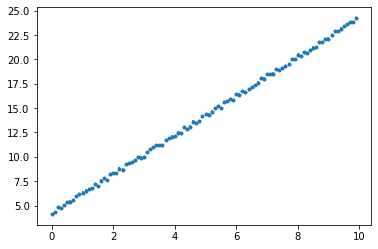

In [27]:
data = np.loadtxt('simplemc/data/line_data.txt')
err = np.loadtxt('simplemc/data/line_cov.txt')
plt.errorbar(data[:,0], data[:,1], yerr=np.diag(err), fmt='.')

In [28]:
def my_model(parameterlist, x):
    m, b = parameterlist
    return m*x+b

In [29]:
m = Parameter(  "m", 0, 0.05, (0, 5), "m_0")
b = Parameter("b", 3, 0.05, (0, 6), "b_0")

# create a list with your parameters objects
parameterlist = [m, b]

In [33]:
analyzer = DriverMC(model='simple', datasets='dline', analyzername='nested',
                    custom_parameters=parameterlist, custom_function=my_model)

#nproc indicates te number of processors to parallelize.
res_custom = analyzer.executer(nlivepoints=100, accuracy=10, nproc=4)

INFO:simplemc:Loading /content/src/simplemc/simplemc/data/line_data.txt
INFO:simplemc:Free parameters and its bounds:
INFO:simplemc:m = 0 +/- 0.05
INFO:simplemc:b = 3 +/- 0.05
INFO:simplemc:Using 4 processors of 2 .
INFO:simplemc:
	nlivepoints: 100
	accuracy: 10
	nested type: multi


it: 1093 | ncall: 5325 | eff: 20.545 | logz: -308.7844 | dlogz: 10.0707 | loglstar: -296.0149 | point 1.99569018 4.33907526

INFO:simplemc:
Elapsed time: 0.432 minutes = 25.909 seconds



Covariance matrix saved in .covmat file
 [[ 3.28262910e-06 -1.41361485e-05]
 [-1.41361485e-05  9.15027176e-05]] 

simplemc/chains/simple_phy_dline_nested_multi_1.txt
Removed no burn in

getdist cov
 [[ 3.15115606e-06 -1.35699760e-05]
 [-1.35699760e-05  8.78378812e-05]] 

m: 2.0015 +/- 0.0018
b: 4.3273 +/- 0.0096

Information criterions:

	AIC: 579.8095


In [34]:
samples = res_custom['result']['samples']
weights = res_custom['result']['weights']
# mpar = res_custom['result']['samples'][:,0]
# bpar = res_custom['result']['samples'][:,1]




Removed no burn in


((0.023462677202231712, 4.77528879938277),
 (-0.1546213693639591, 6.1921662413719805))

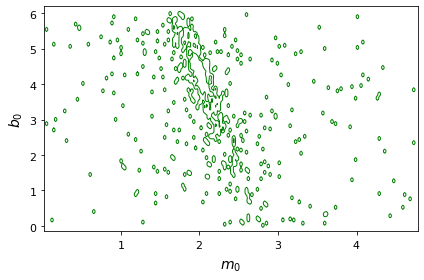

In [35]:
labels =  ['{}'.format(p.Ltxname) for p in analyzer.pars_info]
samp = MCSamples(samples=samples, names=labels, labels = labels)
g = plots.get_single_plotter(width_inch=6, ratio= 2. / 3.)
# g.settings.legend_fontsize = 12
g.plot_2d(samp, labels[0], labels[1], filled=False, line_args={'lw':1},
          colors=['green', 'red', 'indigo'], smooth=1)

## 6.2 Based on $\Lambda$CDM

- Review LCDMCosmology and BaseCosmology.

In [18]:
from simplemc.cosmo.Parameter import Parameter
from simplemc.DriverMC import DriverMC

In [21]:
Oextra = Parameter('Oextra', 0.1, 0.001, (0, 0.2), '\Omega_{extra}')

paramlist = [Oextra]
#H2/H02
cosmo_model = 'Ocb/a**3+0.002/a**4+(1.0-0.3-Oextra)'

analyzer = DriverMC(model='simple_cosmo', datasets='SN', analyzername='nested',
                    custom_parameters=paramlist, custom_function=cosmo_model)

Loading  /content/src/simplemc/simplemc/data/jla_binned_distances_31nodes_v1.txt
Loading  /content/src/simplemc/simplemc/data/cov_jla_binned_distances_31nodes_v1.txt
Eigenvalues of cov matrix: [0.0005070806003107862, 0.0005683516014088379, 0.0007392509073862131] ... 0.036459822761285926
Adding marginalising constant
Free parameters:
Om = 0.3038 +/- 0.05
Obh2 = 0.02234 +/- 0.001
h = 0.6821 +/- 0.05
Oextra = 0.1 +/- 0.001


In [22]:
res = analyzer.executer(nlivepoints=100)

INFO:simplemc:Using 1 processor
INFO:simplemc:
	nlivepoints: 100
	accuracy: 0.01
	nested type: multi


it: 756 | ncall: 4527 | eff: 16.722 | logz: -19.5313 | dlogz: 0.0100 | loglstar: -16.6153 | point 0.26724684 0.02208286 0.6544996  0.10147504

INFO:simplemc:
Elapsed time: 9.981 minutes = 598.880 seconds



Covariance matrix saved in .covmat file
 [[ 1.27830508e-03  1.10075467e-06 -2.09239763e-04 -1.02249631e-03]
 [ 1.10075467e-06  2.20424813e-07 -1.16697657e-06 -7.06769517e-07]
 [-2.09239763e-04 -1.16697657e-06  2.02975893e-02 -1.26939730e-04]
 [-1.02249631e-03 -7.06769517e-07 -1.26939730e-04  3.35233990e-03]] 

simplemc/chains/simple_cosmo_phy_SN_nested_multi_1.txt
Removed no burn in

getdist cov
 [[ 1.27516955e-03  1.09804960e-06 -2.08726548e-04 -1.01998828e-03]
 [ 1.09804960e-06  2.19884100e-07 -1.16409844e-06 -7.05034144e-07]
 [-2.08726548e-04 -1.16409844e-06  2.02478018e-02 -1.26628361e-04]
 [-1.01998828e-03 -7.05034144e-07 -1.26628361e-04  3.34411705e-03]] 

Om: 0.2698 +/- 0.0358
Obh2: 0.0220 +/- 0.0005
h: 0.6448 +/- 0.1425
Oextra: 0.1004 +/- 0.0579

Information criterions:

	AIC: 41.2112


In [ ]:
samples = res['result']['samples']
weights = res['result']['weights']

In [ ]:
labels =  ['{}'.format(p.Ltxname) for p in analyzer.pars_info]
labels, np.shape(samples1)

(['\\Omega_m', '\\Omega_{b}h^2', 'h', '\\Omega_{extra}'], (700, 3))

In [ ]:
samp = MCSamples(samples=samples, names=labels, labels = labels)


Removed no burn in


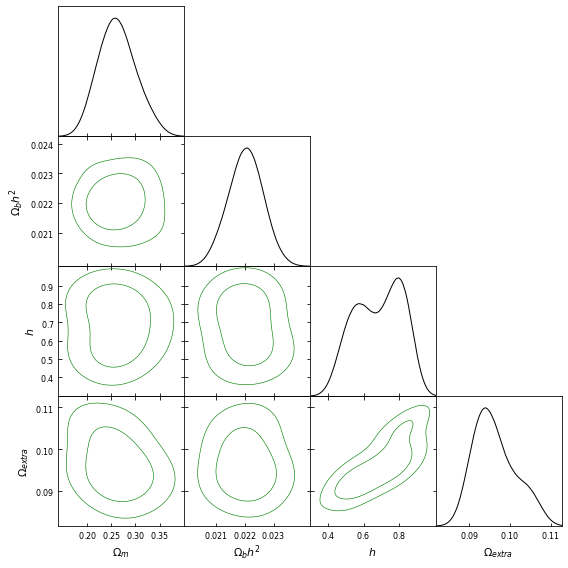

In [ ]:
g = plots.get_subplot_plotter()
g.triangle_plot([samp], filled=False, line_args={'lw':1},
                colors=['green', 'red', 'indigo'],
                settings={ 'smooth_scale_2D':0.8, 'smooth_scale_1D':0.6},)